In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree

import warnings
warnings.filterwarnings("ignore")



df=pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
#DecisionTree ile ML yapıcaz
df.drop("id",axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.columns=['age','blood_pressure','specific_gravity','albumin','sugar',
            'red_blood_cells','pus_cell','pus_cell_clumbs',
            'bacteria','blood_glucose_random','blood_urea',
            'serum_creatinine','sodium','potassium','hemoglobin',
            'packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
            'hypertension','diabetes_mellitus','coronary_artery_disease',
            'appetite','peda_edema','aanemia','class'
    
]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [5]:
describe=df.describe()
describe

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df['packed_cell_volume']=pd.to_numeric(df['packed_cell_volume'],errors='coerce') #coerce anlamı: eğer sayıya çeviremiyorsan bu çevirmediğin yere nan yaz yani sayı yazma ve çeviremediğin için de hata verme diyoruz!
df['white_blood_cell_count']=pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count']=pd.to_numeric(df['red_blood_cell_count'],errors='coerce')
#mesela abc bunu sayıya çeviremez onun yerine nan yazar

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [8]:
#EDA
cat_cols=[col for col in df.columns if df[col].dtype=="object"] #list comprehension!
num_cols=[col for col in df.columns if df[col].dtype!="object"]

for col in  cat_cols:
    print(f"{col}: {df[col].unique()}")
    

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
hypertension: ['yes' 'no' nan]
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease: ['no' 'yes' '\tno' nan]
appetite: ['good' 'poor' nan]
peda_edema: ['no' 'yes' nan]
aanemia: ['no' 'yes' nan]
class: ['ckd' 'ckd\t' 'notckd']


In [9]:
"""
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease: ['no' 'yes' '\tno' nan]
class: ['ckd' 'ckd\t' 'notckd']
"""

df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'].replace(to_replace={'\tno':'no'},inplace=True)

df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [10]:
#kontrol edelim değişmiş mi
for col in  cat_cols:
    print(f"{col}: {df[col].unique()}")
    

red_blood_cells: [nan 'normal' 'abnormal']
pus_cell: ['normal' 'abnormal' nan]
pus_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
hypertension: ['yes' 'no' nan]
diabetes_mellitus: ['yes' 'no' nan]
coronary_artery_disease: ['no' 'yes' nan]
appetite: ['good' 'poor' nan]
peda_edema: ['no' 'yes' nan]
aanemia: ['no' 'yes' nan]
class: ['ckd' 'notckd']


In [11]:
df["class"] = df["class"].apply(lambda x: 0 if x == "ckd" else 1)
#yada böyle
#df["class"]=df["class"].map({"ckd":0,"notckd":1})
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumbs,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


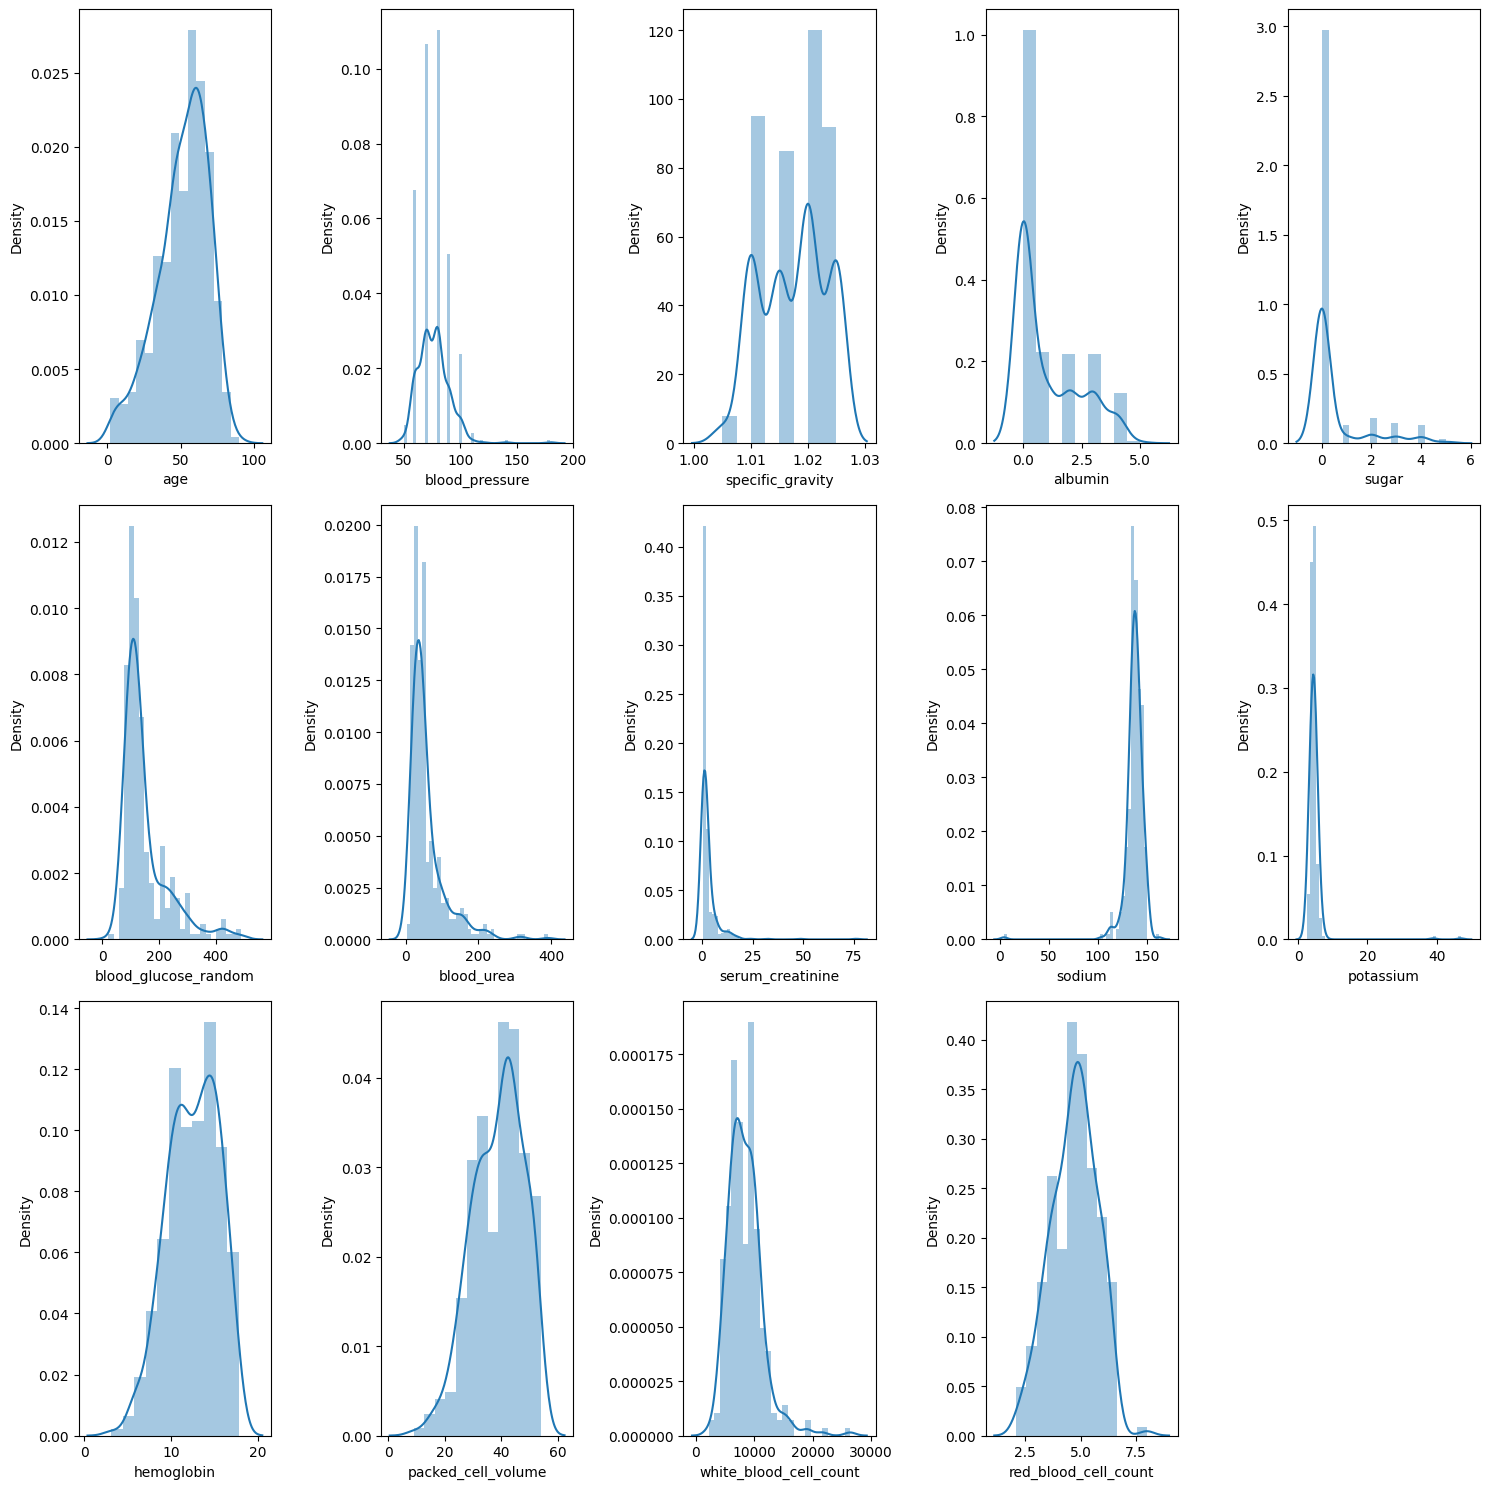

In [12]:
plt.figure(figsize=(15,15))
plotnumber=1

for col in num_cols:
    if plotnumber<=14:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()
# figürdeki alt grafiklerin (subplots) kenar boşluklarını otomatik ayarlayarak; eksen etiketleri, başlıklar, tick etiketleri, 
# lejant gibi öğelerin birbirinin üstüne binmesini engeller. Kısaca: “sığdır ve çakışmayı azalt.
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumbs          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

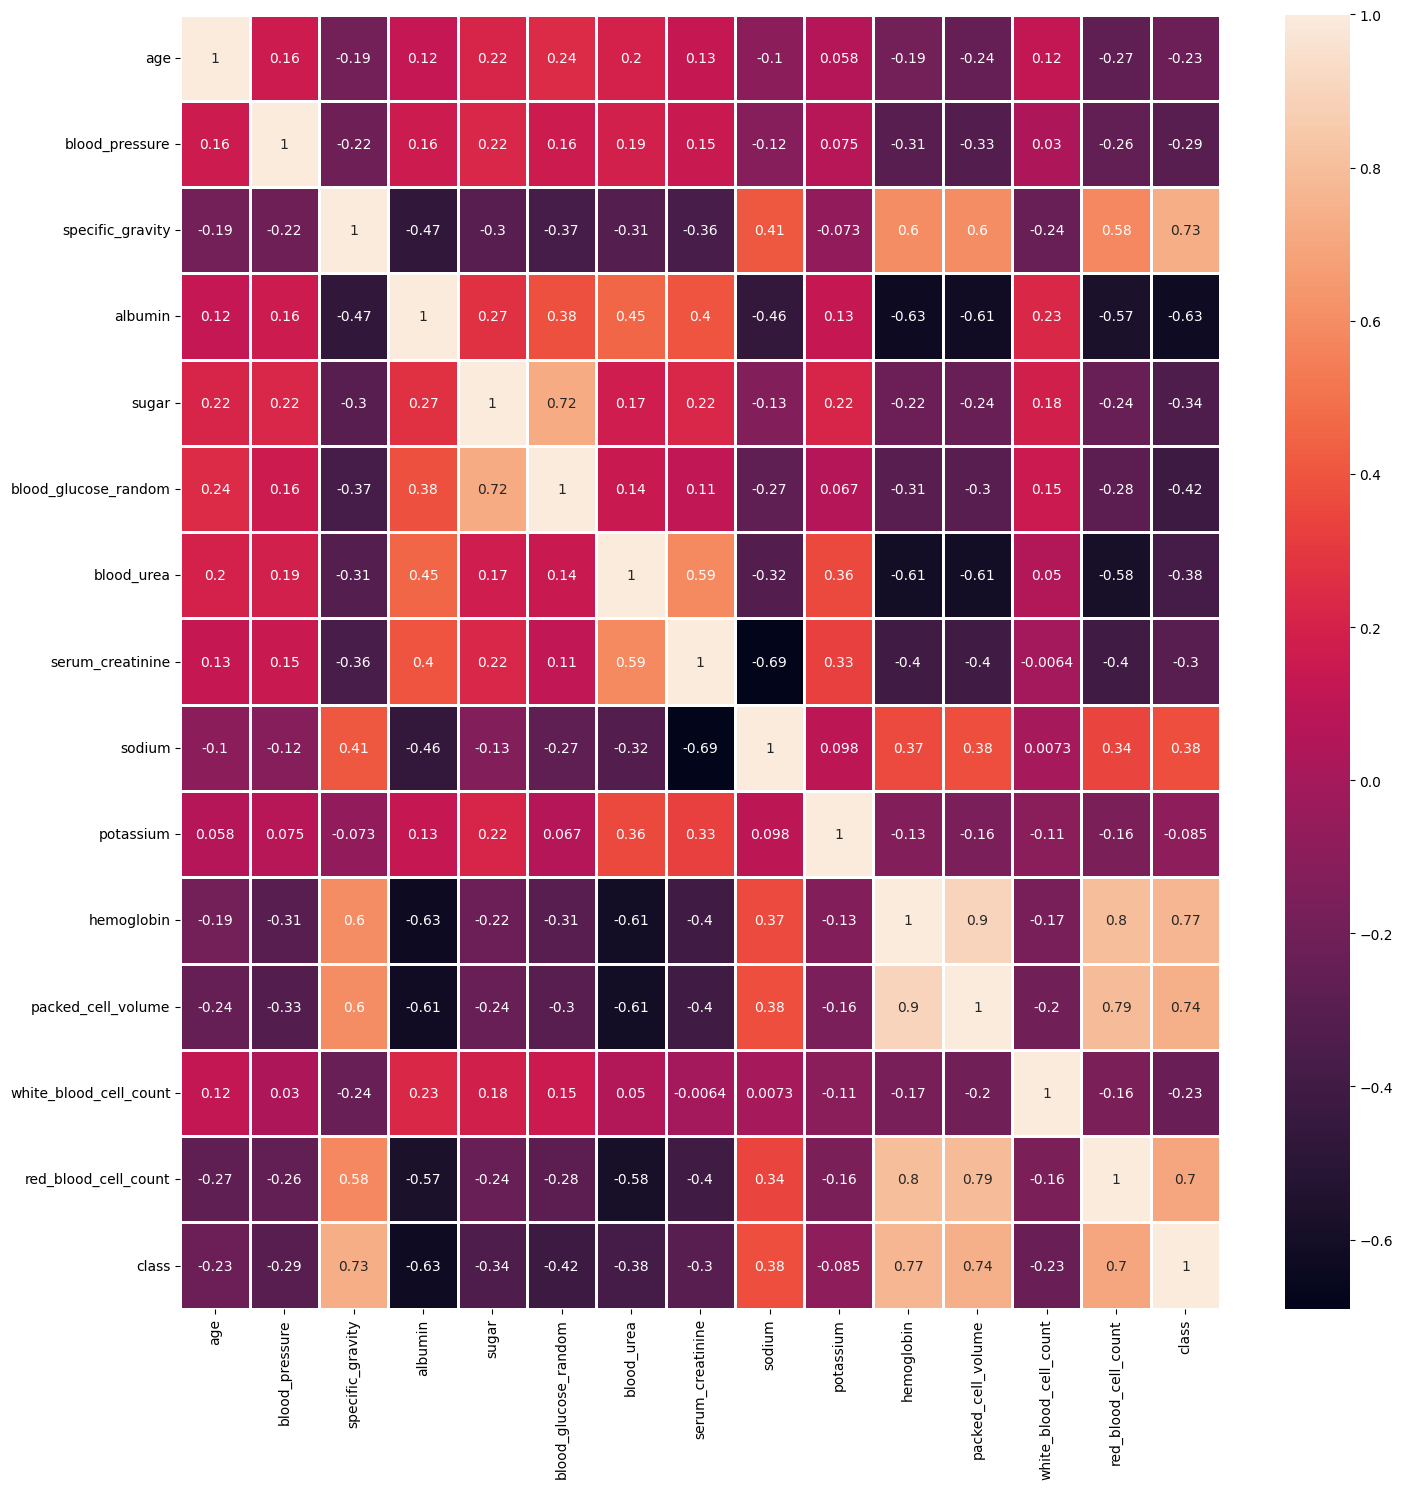

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, linewidths=2, linecolor='white')
plt.tight_layout()
plt.show()


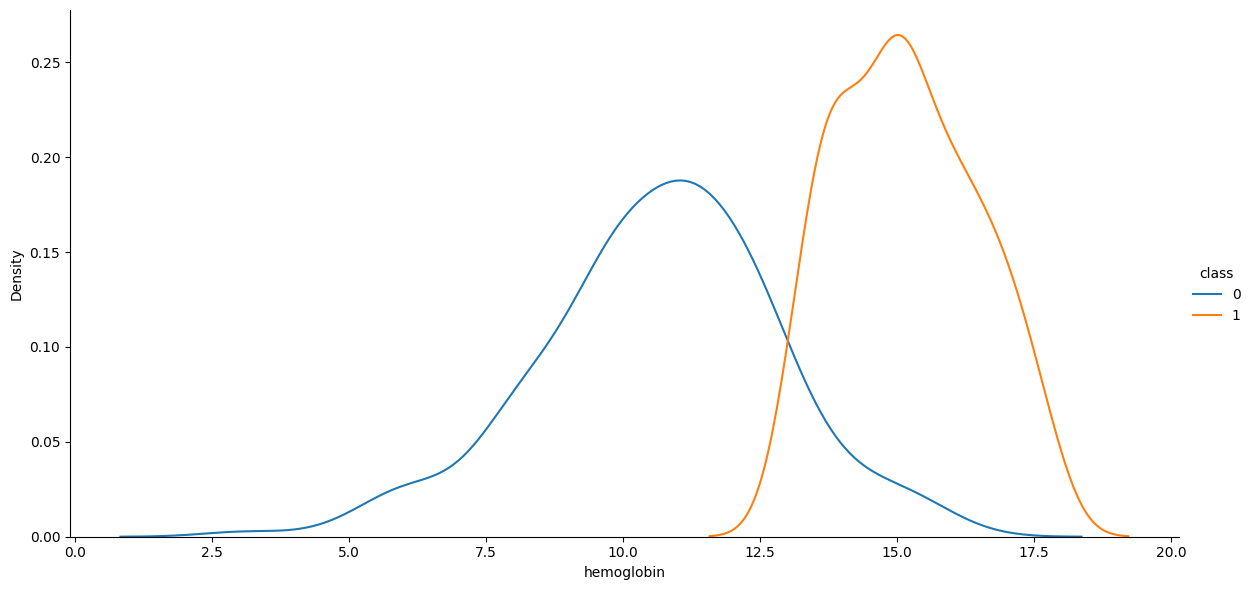

In [15]:
#kernel dense estimation

def kde(col):
    grid=sns.FacetGrid(df,hue="class",height=6,aspect=2)
    grid.map(sns.kdeplot,col) #FacetGrid’in her hue grubu için sns.kdeplot (Kernel Yoğunluk Tahmini) çağrılır. col: x-değişkeni olarak kullanılacak sütun adı. Her sınıfın dağılımı aynı eksende üst üste çizilir.
    grid.add_legend()#Renklerin hangi sınıfa ait olduğunu gösteren bir lejant ekler.
kde("hemoglobin")
#0 ckd var kabul ettik; 1 ckd yok kabul ettik tam tersini de yapabilirdik
#bir özelliğin (örn. hemoglobin) sınıfları ne kadar iyi ayırdığını ve dağılımının şeklini görmek için çizdik.

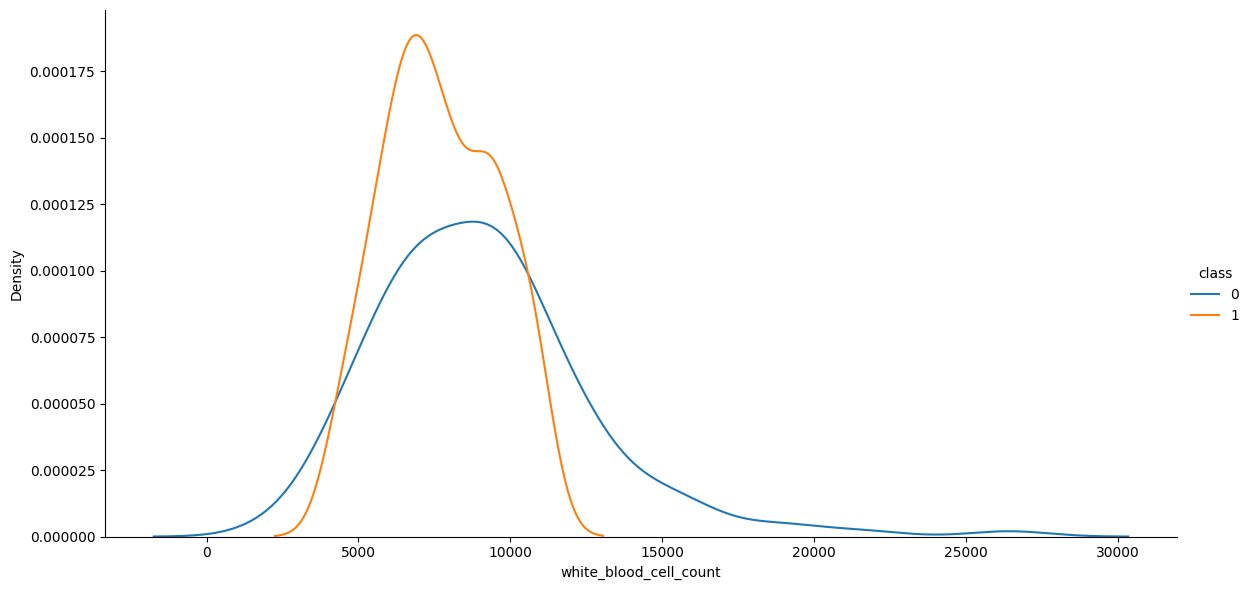

In [16]:
kde("white_blood_cell_count")

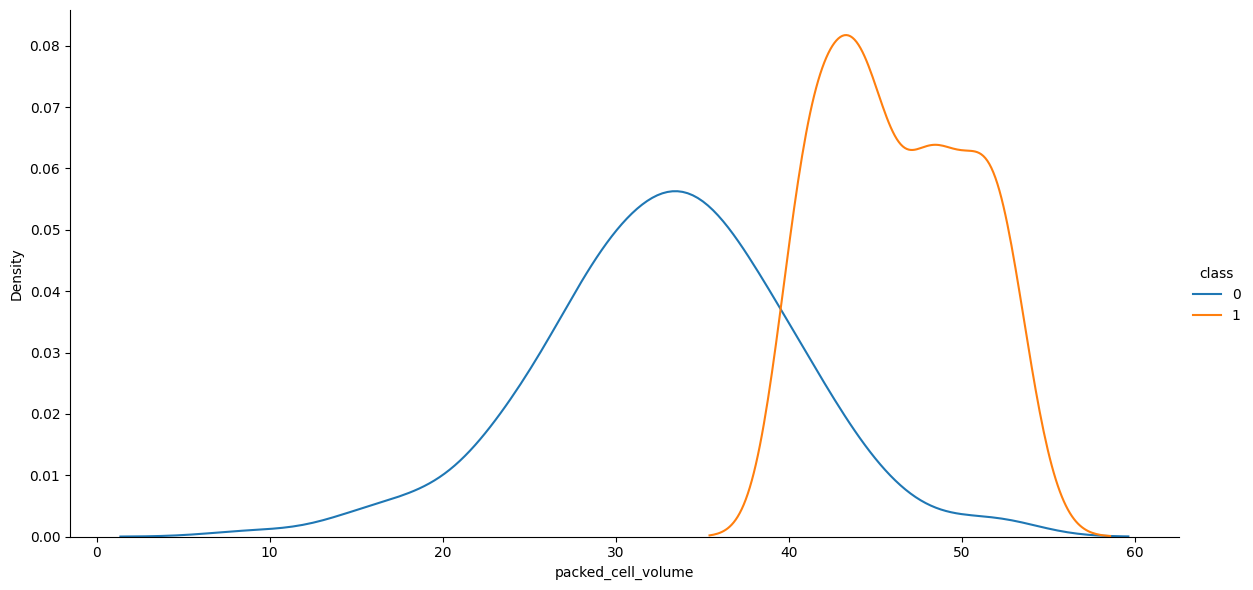

In [17]:
kde("packed_cell_volume")

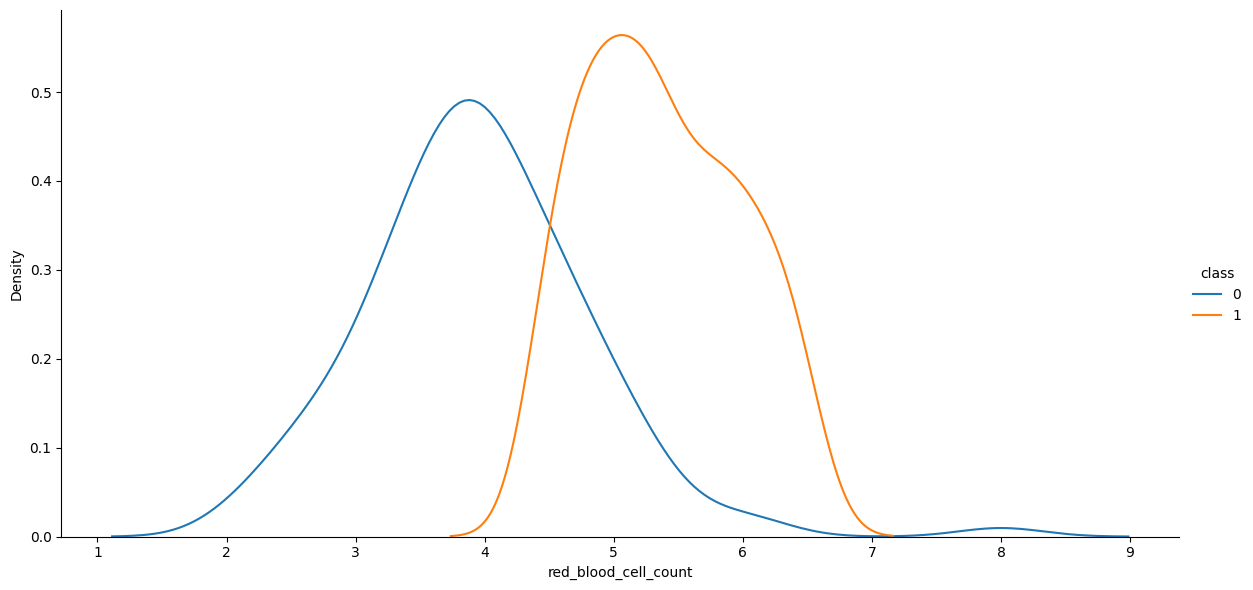

In [18]:
kde("red_blood_cell_count")

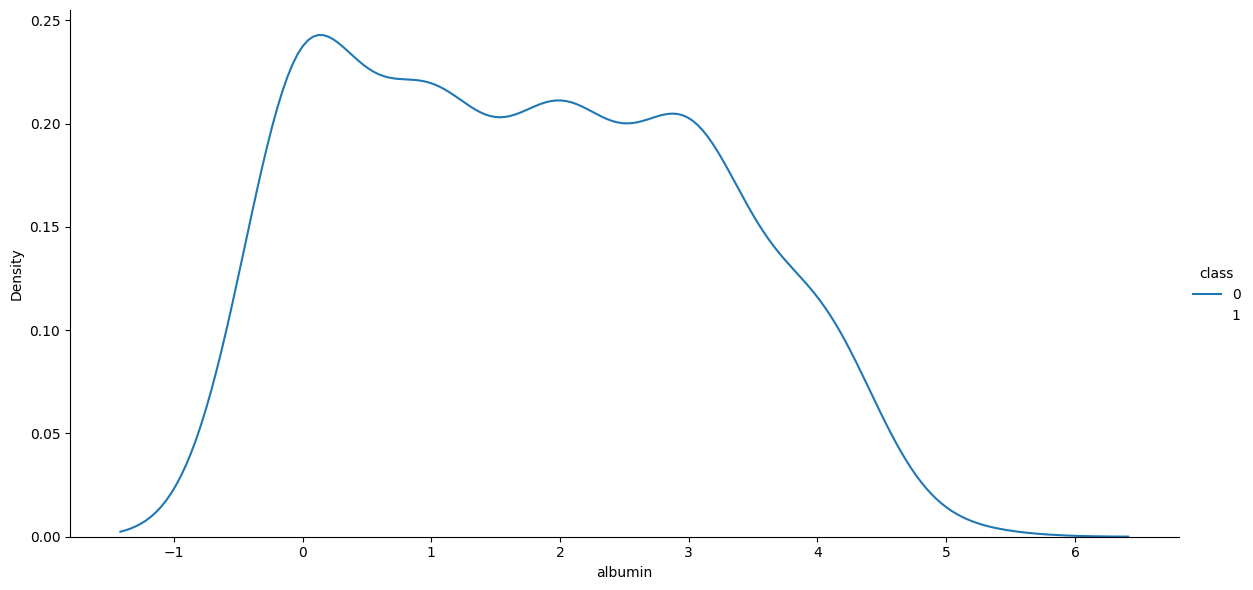

In [19]:
kde("albumin")

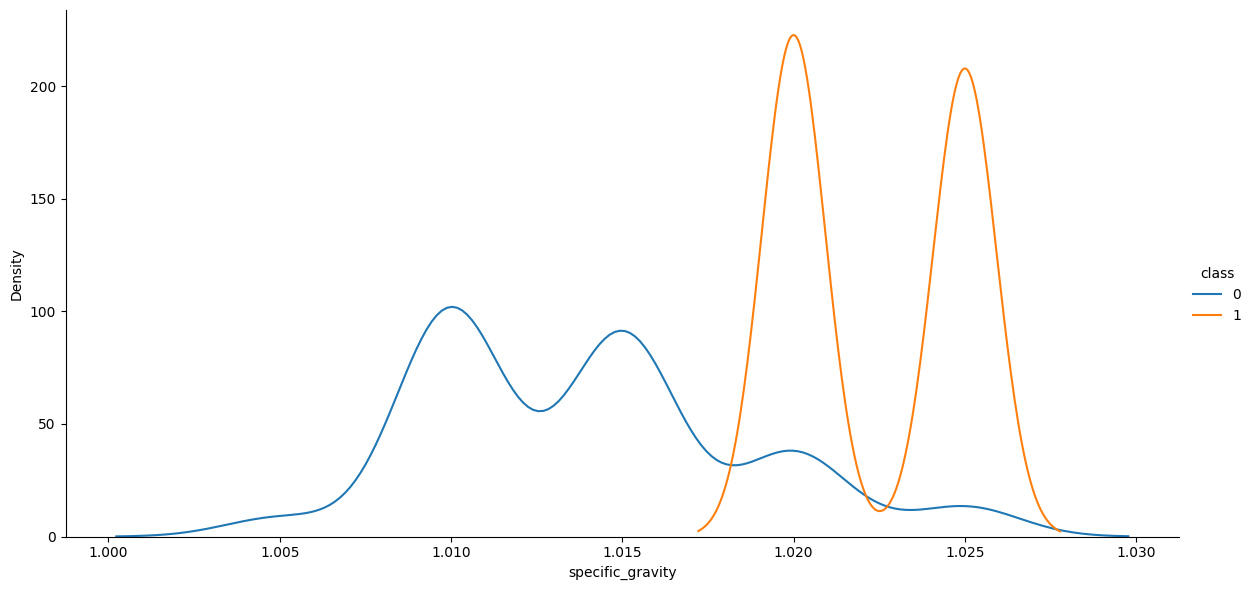

In [20]:
kde("specific_gravity")

In [21]:
#kayıp veri
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumbs              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:
def solve_missing(feature):
    random_sample=df.dropna().sample(df[feature].isna().sum())#feature sütununda kaç eksik varsa, o kadar tam dolu satır örneklenir ve bu satırlardaki feature değerleriyle boşlar doldurulur.

    random_sample.index=df[df[feature].isnull()].index #random_sample’ın indeksini, df’de feature sütunu NaN olan satırların indeksleriyle eşitleyip sonraki atamanın doğru satırlara hizalanmasını sağlar.
    df.loc[df[feature].isnull(),feature]=random_sample    

for col in num_cols:
    solve_missing(col)

#kontrol et missing var mı hala
df[num_cols].isnull().sum()

# solve_missing metodu: feature sütununda kaç NaN varsa sayar, NaN içermeyen satırlardan 
# aynı sayıda rastgele örnek seçer, seçilen değerleri NaN olan indekslere hizalayıp yazar.

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [23]:
# solve_missing("red_blood_cells")
# solve_missing("pus_cell")

In [24]:
def solve_missing_cat(feature):
    mode=df[feature].mode()[0]
    df[feature]=df[feature].fillna(mode)


for cat in cat_cols:
    print(f"cat: {cat}")
    solve_missing_cat(cat)

cat: red_blood_cells
cat: pus_cell
cat: pus_cell_clumbs
cat: bacteria
cat: hypertension
cat: diabetes_mellitus
cat: coronary_artery_disease
cat: appetite
cat: peda_edema
cat: aanemia
cat: class


In [25]:
#kontrol
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumbs            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [26]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumbs            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [27]:
#feature encoding
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} ") #number of unique

red_blood_cells: 2 
pus_cell: 2 
pus_cell_clumbs: 2 
bacteria: 2 
hypertension: 2 
diabetes_mellitus: 2 
coronary_artery_disease: 2 
appetite: 2 
peda_edema: 2 
aanemia: 2 
class: 2 


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for col in cat_cols:
    df[col]=encoder.fit_transform(df[col])

In [29]:
#model

independent_col=[col   for col in df.columns if  col!="class"]
dependent_col="class" #hedef değişken olan class sütunu diğer X yani inputlara bağlı olarak 1 yada 0 olduğında hedef değişkene dependent dedik

X=df[independent_col]
y=df[dependent_col]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [30]:
y_pred=dt.predict(X_test)

acc=accuracy_score(y_test,y_pred)
acc

0.9875

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
#gerçekte 0 olup,  0 tahmin edttiğimiz 49
#gerçekte 1 olup , 1 tahmin ettiğimiz 27 adet
#gerçekte 0 olup, 1 tahmin ettiğimiz 3 adet
#gerçekte 1 olup, bizim 0 tahmin ettiğimiz 1 adet

[[51  1]
 [ 0 28]]


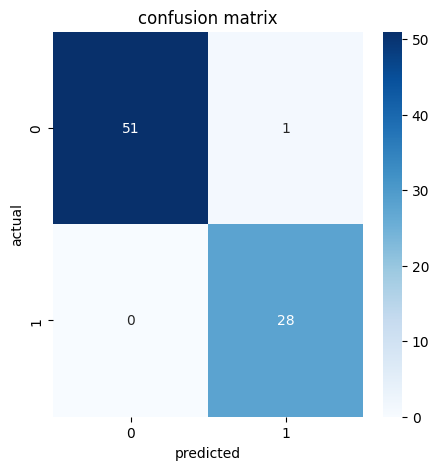

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues") #fmt ="d" decimal tamsayı demek
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

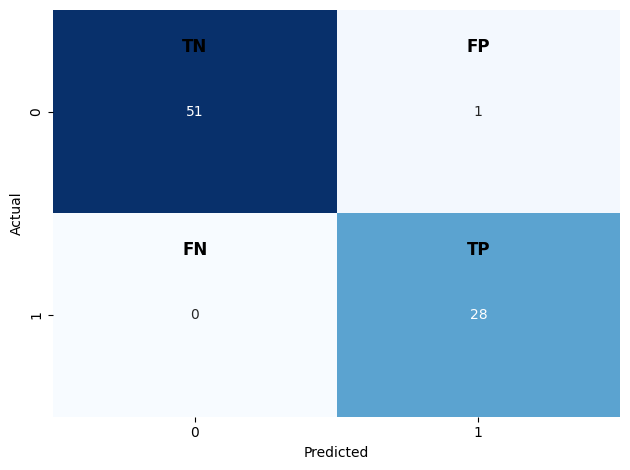

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# örnek


# Etiket sırası ÖNEMLİ: [negatif, pozitif]
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=labels, yticklabels=labels, cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# 2×2 için yerleşim: [[TN, FP],[FN, TP]]
tags = np.array([['TN','FP'],['FN','TP']])
for i in range(2):
    for j in range(2):
        ax.text(j+0.5, i+0.18, tags[i,j],
                ha='center', va='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout(); plt.show()


In [34]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



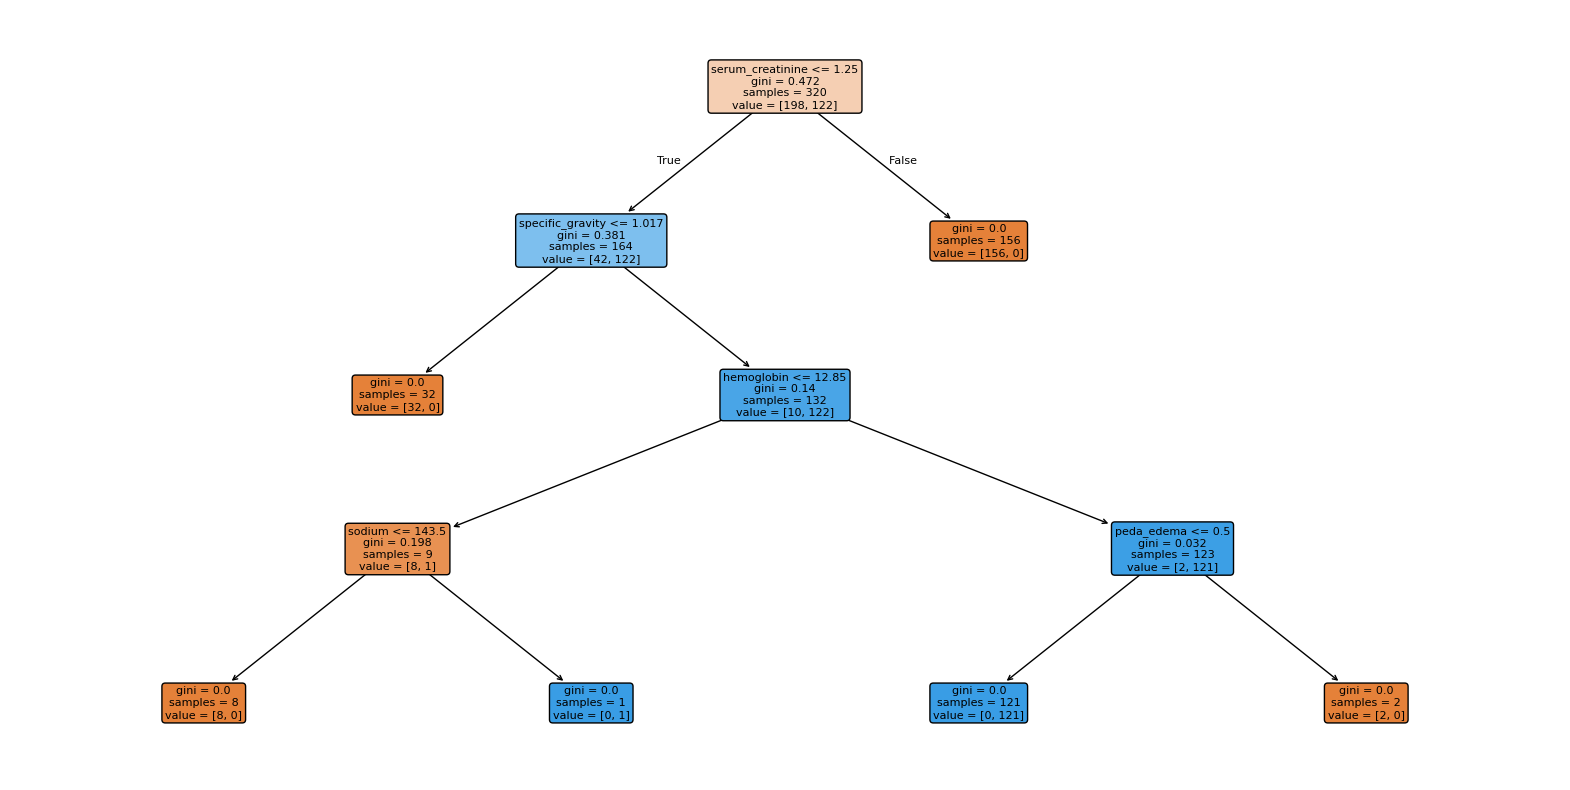

In [35]:
class_names=["ckd","notckd"]
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=independent_col,filled=True,rounded=True,fontsize=8)
plt.show()

In [36]:
#not : yukarıda cerum_creatine ağaç yapısının en tepesinde çünkü coreleasyonda zaten bu cerum_creatine ile class arasındaki ilişki de en yüksek çıkmıştı
#yani fetureların hedef değişkenle alakasına göre aslında bu ağaç yapısının nerseinde olacağı belirleniyor

In [37]:
# #şunu deneyelim
# dt=DecisionTreeClassifier(max_depth=1)
# dt.fit(X_train,y_train)
# class_names=["ckd","notckd"]
# plt.figure(figsize=(20,10))
# plot_tree(dt,feature_names=independent_col,filled=True,rounded=True,fontsize=8)
# plt.show() #en önemli feature serum_creatine miş


In [52]:
feature_importance=pd.DataFrame({"Feature": independent_col, "Importance":dt.feature_importances_})

In [53]:
feature_importance.sort_values(by="Importance",ascending=False)
feature_importance.sort_values(by="Importance",ascending=False).iloc[0]

Feature       serum_creatinine
Importance            0.586105
Name: 11, dtype: object

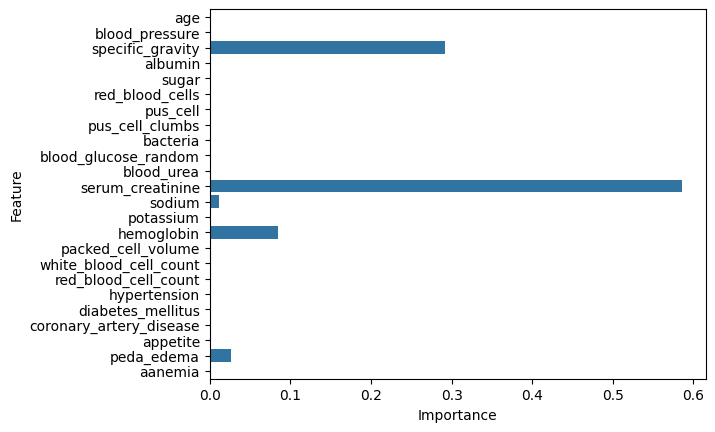

In [54]:
plt.figure()
sns.barplot(x="Importance",y="Feature",data=feature_importance)
plt.show()